Unusual sales trends flagged:
          date       sales  anomaly  anomaly_flag
10 2024-01-11  350.000000       -1             1
31 2024-02-01  237.045564       -1             1
50 2024-02-20  400.000000       -1             1
74 2024-03-15  147.605098       -1             1
80 2024-03-21   50.000000       -1             1


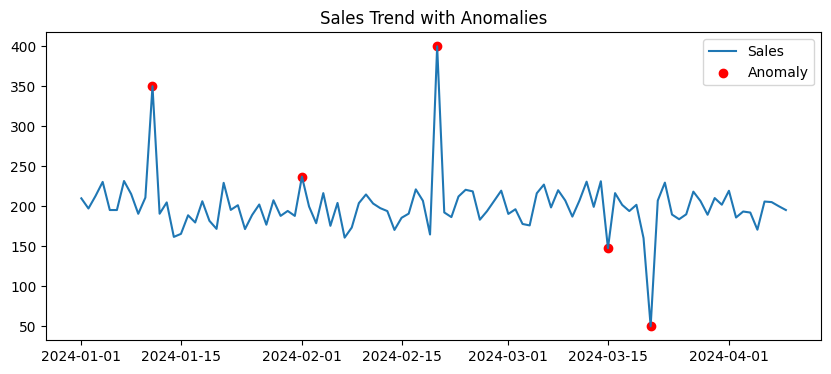


Potential duplicate groups (same cluster):
          name              email  age  cluster
0  Alice Smith    alice@email.com   30        0
4  Charlie Ray  charlie@email.com   25        0
5  Charlie Ray  charlie@email.com   25        0


...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK



Classification Report for Data Validation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ---------------------------
# Task 1: Predict & Flag Unusual Sales Trends
# ---------------------------
# Create mock sales data
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=100)
sales = np.random.normal(200, 20, 100)
# Inject anomalies
sales[10] = 350
sales[50] = 400
sales[80] = 50
sales_data = pd.DataFrame({'date': dates, 'sales': sales})

# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
sales_data['anomaly'] = iso_forest.fit_predict(sales_data[['sales']])
sales_data['anomaly_flag'] = sales_data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

print("Unusual sales trends flagged:\n", sales_data[sales_data['anomaly_flag'] == 1])

plt.figure(figsize=(10,4))
plt.plot(sales_data['date'], sales_data['sales'], label='Sales')
plt.scatter(sales_data[sales_data['anomaly_flag']==1]['date'],
            sales_data[sales_data['anomaly_flag']==1]['sales'],
            color='red', label='Anomaly')
plt.legend()
plt.title("Sales Trend with Anomalies")
plt.show()

# ---------------------------
# Task 2: Clustering to Detect Duplicate Records
# ---------------------------
# Create mock customer data with near-duplicates
customer_data = pd.DataFrame({
    'name': ['Alice Smith', 'Alic Smith', 'Bob Jones', 'B. Jones', 'Charlie Ray', 'Charlie Ray'],
    'email': ['alice@email.com', 'alice@email.com', 'bob@email.com', 'bob@email.com', 'charlie@email.com', 'charlie@email.com'],
    'age': [30, 30, 45, 45, 25, 25]
})

# Convert names to feature vectors using simple string length and email matching
features = customer_data[['age']].copy()
features['name_len'] = customer_data['name'].apply(len)
features['email_match'] = customer_data['email'].apply(lambda x: sum(customer_data['email'] == x))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

dbscan = DBSCAN(eps=0.8, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)
customer_data['cluster'] = clusters

print("\nPotential duplicate groups (same cluster):")
print(customer_data[customer_data['cluster'] != -1].sort_values('cluster'))

# ---------------------------
# Task 3: Classification Model for Data Validation
# ---------------------------
# Mock labeled data: 0 = valid, 1 = invalid
data = {
    'age': [25, 130, 40, -5, 60, 35, 200, 28],
    'salary': [50000, 60000, 70000, 80000, -1000, 90000, 100000, 110000],
    'label': [0, 1, 0, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

X = df[['age', 'salary']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report for Data Validation:\n", classification_report(y_test, y_pred))

# Error handling example
try:
    assert not df.empty, "DataFrame is empty."
    assert len(set(y)) > 1, "Not enough label classes."
except AssertionError as e:
    print(f"Error: {e}")

# Unit test example
import unittest

class TestDataQualityML(unittest.TestCase):
    def test_anomaly_flags(self):
        self.assertTrue(sales_data['anomaly_flag'].sum() > 0)
    def test_duplicate_clusters(self):
        self.assertTrue((customer_data['cluster'] != -1).any())
    def test_classification_shape(self):
        self.assertEqual(len(y_pred), len(y_test))

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)